In [1]:
# math etc.
from scipy import misc
import numpy as np

#plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#image functions, esp. resizing
import cv2
#directory functions
import os

In [2]:
import tensorflow as tf


In [3]:
def cuttleVision(cSpher,fN,nStk,off,defAtt):
    img = 1.0*misc.imread(fN)
    sBNarrower = 1.0*misc.imread('./sBandiensisNarrower-1.tif')
    sBNarrow = 1.0*misc.imread('./sBandiensisNarrow-1.tif')
    sBFull = 1.0*misc.imread('./sBandiensisFuller-1.tif')
    
    dimX = np.shape(sBNarrower)[0]
    mid = dimX/2
    dimImg = np.shape(img)[0]
    
    N = 12.5 #25mm eye
    x1, y1 = np.meshgrid(np.arange(-N,N-N/dimX,2*N/dimX),np.arange(-N,N-N/dimX,2*N/dimX))
    
    rad = np.sqrt(x1**2+y1**2)
    
    apDef = np.exp(np.sqrt(3)*(2*rad**2-1))
    apSpher = np.exp(np.sqrt(5) * (6*rad**4 - 6*rad**2+1))
    
    nStk = 2 # three focus depths
    
    
    imgStack = np.zeros([dimImg,dimImg,3])
    
    myPSFDim = 48
    PSF = np.zeros([myPSFDim*2,myPSFDim*2,9])
    
    for c in range(0,nStk+1):
        
        cChromR = 1 - (c / (nStk))
        cChromB = 1.0 - cChromR
        cChromG = 0.5 - cChromR
        if (0):
            apR1 = (sBNarrow) * np.exp(1j*2*np.pi*(cChromR/defAtt*apDef+cSpher*apSpher));
            apG1 = (sBNarrow) * np.exp(1j*2*np.pi*(cChromG/defAtt*apDef+cSpher*apSpher));
            apB1 = (sBNarrow) * np.exp(1j*2*np.pi*(cChromB/defAtt*apDef+cSpher*apSpher));
        if(1):
            apR1 = (sBFull) * np.exp(1j*2*np.pi*(cChromR/defAtt*apDef+cSpher*apSpher));
            apG1 = (sBFull) * np.exp(1j*2*np.pi*(cChromG/defAtt*apDef+cSpher*apSpher));
            apB1 = (sBFull) * np.exp(1j*2*np.pi*(cChromB/defAtt*apDef+cSpher*apSpher));
        
        apR1 = np.nan_to_num(apR1)
        apG1 = np.nan_to_num(apG1)
        apB1 = np.nan_to_num(apB1)
                
        PSF1R = np.abs(np.fft.fft2(apR1))**2
        PSF1G = np.abs(np.fft.fft2(apG1))**2
        PSF1B = np.abs(np.fft.fft2(apB1))**2
        
        #normalize PSFs
        if (0):
            PSF1R = PSF1R/np.max(np.max(PSF1R)); #%abs(fft(apR1)).^2;
            PSF1G = PSF1G/np.max(np.max(PSF1G));
            PSF1B = PSF1B/np.max(np.max(PSF1B));
        
        tempR = np.abs(np.fft.ifft2(np.fft.fft2(img[:,:,0],[dimX,dimX])*np.fft.fft2(PSF1R)))
        tempG = np.abs(np.fft.ifft2(np.fft.fft2(img[:,:,1],[dimX,dimX])*np.fft.fft2(PSF1G)))
        tempB = np.abs(np.fft.ifft2(np.fft.fft2(img[:,:,2],[dimX,dimX])*np.fft.fft2(PSF1B)))
        
        tempR = (tempR - np.min(tempR)) / np.max(tempR)
        tempG = (tempG - np.min(tempG)) / np.max(tempG)
        tempB = (tempB - np.min(tempB)) / np.max(tempB)
        
        tempR = tempR[0:dimImg,0:dimImg]
        tempG = tempG[0:dimImg,0:dimImg]
        tempB = tempB[0:dimImg,0:dimImg]
        
        myPSFDim = 48
        PSF1R = np.fft.fftshift(PSF1R)[int(dimX/2)-myPSFDim:int(dimX/2)+myPSFDim,int(dimX/2)-myPSFDim:int(dimX/2)+myPSFDim]
        PSF1G = np.fft.fftshift(PSF1G)[int(dimX/2)-myPSFDim:int(dimX/2)+myPSFDim,int(dimX/2)-myPSFDim:int(dimX/2)+myPSFDim]
        PSF1B = np.fft.fftshift(PSF1B)[int(dimX/2)-myPSFDim:int(dimX/2)+myPSFDim,int(dimX/2)-myPSFDim:int(dimX/2)+myPSFDim]
        
        imgStack[:,:,c] = tempR + tempG + tempB
        if(0):
            imgStack[:,:,c*3+0] = tempR
            imgStack[:,:,c*3+1] = tempG
            imgStack[:,:,c*3+2] = tempB
        if(1):
            PSF[:,:,c*3+0] = PSF1R
            PSF[:,:,c*3+1] = PSF1G
            PSF[:,:,c*3+2] = PSF1B
        if (0): #plot for debugging/testing defocus parameters
            plt.figure(figsize=(12,12))
            plt.subplot(321)
            plt.imshow(tempR,cmap='gray')
            plt.subplot(322)
            plt.imshow(tempG,cmap='gray')
            plt.subplot(323)
            plt.imshow(tempB,cmap='gray')
            #plt.figure()
            #plt.imshow(PSF1R)
            plt.show()
            myImgRGB = np.zeros([dimImg,dimImg,3])
            myImgRGB[:,:,0] = tempR
            myImgRGB[:,:,1] = tempG
            myImgRGB[:,:,2] = tempB
            plt.figure(figsize=(6,6))
            plt.imshow(myImgRGB)
            #plt.figure()
            #plt.imshow(PSF1R)
            plt.show()
    return imgStack, PSF

/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in exp
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in exp
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: overflow encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: overflow encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in multiply
/home/main/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: overflow encountered in multiply


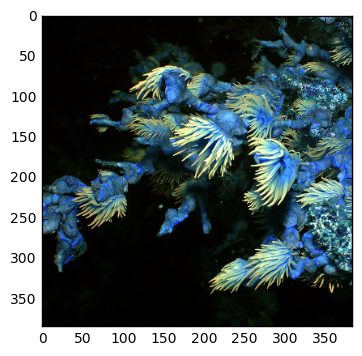

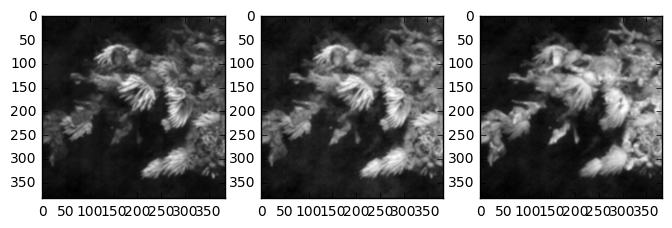

In [9]:
fN = './miniImgs/miniSea_Cotton.tif'

myTgt = cv2.imread(fN)
if(0): #Can't figure out why the colors are mixed up when displayed, imwrite works fine
    myTgtR = myTgt[:,:,0]
    myTgtG = myTgt[:,:,1]
    myTgtB = myTgt[:,:,2]
    myTG = np.zeros(np.shape(myTgt))
    myTG[:,:,0] = myTgtR
    myTG[:,:,1] = myTgtG
    myTG[:,:,2] = myTgtB
    print(np.shape(myTG))

cSpher = 0
nStk = 3
off = 0
defAtt = 1e-11
imgStk, PSFStk = cuttleVision(cSpher,fN,nStk,off,defAtt)
plt.figure()
plt.imshow(myTgt)
plt.show()
plt.figure(figsize = (8,8))
plt.subplot(131)
plt.imshow(imgStk[:,:,0],cmap = "gray")
plt.subplot(132)
plt.imshow(imgStk[:,:,1],cmap = "gray")
plt.subplot(133)
plt.imshow(imgStk[:,:,2],cmap = "gray")
plt.show()


In [ ]:
myDir = os.listdir('./imgs/')
print(np.shape(myDir))
myResDim = 384
for c in myDir:
    print(c)
    myImg = cv2.imread('./imgs/' + str(c))
    myDimX = np.shape(myImg)[0]
    myDimY = np.shape(myImg)[1]
    if (myDimX < myDimY):
        myDim = myDimX
    else:
        myDim = myDimY
    myImg = myImg[0:myDim,0:myDim,:]
    myResImg = cv2.resize(myImg,(myResDim,myResDim), interpolation = cv2.INTER_CUBIC)
    if(0):
        plt.figure()
        plt.imshow(myImg)
        plt.show()
        plt.figure()
        plt.imshow(myResImg)
        plt.show()
    cv2.imwrite('./miniImgs/mini'+str(c)[0:int(len(c)-4)]+'.tif',myResImg)
    
    
if (0):
    fN = './imgs/Sea_Cotton.jpg'
    myImg = cv2.imread(fN)
    myImg = myImg[0:624,0:624]
    myImg2 = cv2.resize(myImg,None,fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)

    plt.figure()
    plt.imshow(myImg)
    plt.figure()
    plt.imshow(myImg2)
    plt.show()
    cv2.imwrite('minSea_Cotton.png',myImg2)

In [ ]:
myMiniDir = os.listdir('./miniImgs/')
cSpher = 0
nStk = 3
off = 0
defAtt = 9e3

for k in myMiniDir:
    #myImg = cv2.imread('./miniImgs/' + str(c))
    print(k)
    imgStk, PSFStk = cuttleVision(cSpher,'./miniImgs/'+str(k),nStk,off,defAtt)
    myFig, myAxes = plt.subplots(1,3,figsize=(10,10))
    for c in range(0,3):
        #for x in range(0,3):
        #plt.subplot(3,3,c+1)
        myAxes[c].imshow(imgStk[:,:,c],cmap="gray")
        myAxes[c].set_xticklabels([])
        myAxes[c].set_yticklabels([])
        #plt.tight_layout()

    plt.show()
            
        
                                           

In [ ]:
cSpher = 0
fN = './imgs/Sea_Cotton.jpg'
nStk = 3
off = 0
defAtt = 9
imgStk, PSFStk = cuttleVision(cSpher,fN,nStk,off,defAtt)

In [ ]:
print(np.shape(imgStk))
print(np.shape(PSFStk))
myFig, myAxes = plt.subplots(3,3,figsize=(10,10))
for c in range(0,3):
    for x in range(0,3):
    #plt.subplot(3,3,c+1)
        myAxes[c,x].imshow(imgStk[:,:,c*3+x],cmap="gray")
        myAxes[c,x].set_xticklabels([])
        myAxes[c,x].set_yticklabels([])
        plt.tight_layout()
    
myFigPSF,myAxesPSF =  plt.subplots(3,3,figsize=(10,10))
for c in range(0,3):
    for x in range(0,3):
        myAxesPSF[c,x].imshow(PSFStk[:,:,c*3+x],cmap="gray")
        myAxesPSF[c,x].set_xticklabels([])
        myAxesPSF[c,x].set_yticklabels([])
        plt.tight_layout()
                        
        
   
plt.show()


In [ ]:
import cv2


fN = './imgs/Sea_Cotton.jpg'
myImg = cv2.imread(fN)
myImg = myImg[0:624,0:624]
myImg2 = cv2.resize(myImg,None,fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)

plt.figure()
plt.imshow(myImg)
plt.figure()
plt.imshow(myImg2)
plt.show()
cv2.imwrite('minSea_Cotton.png',myImg2)

In [ ]:
cSpher = 0
fN = './minSea_Cotton.png'
nStk = 3
off = 0
defAtt = 9e6
cuttleVision(cSpher,fN,nStk,off,defAtt)